# Decision Tree to classify Readmittance

------------------------------------------------------------------------------------------------------------------------------

In [0]:
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName('IMMLDDT').getOrCreate()

In [0]:
file_location = "/FileStore/tables/healthcare_small-5.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

------------------------------------------------------------------------------------------------------------------------------

##### Data pre-processing

In [0]:
# Selecting the dependent and the independent variables that are identified as most useful attributes to make predictions

data=df.select(['readmitted','admission_type','num_procedures','number_emergency'])

In [0]:
data=data.dropna()

In [0]:
# Create a 70-30 train test split

train_data,test_data=data.randomSplit([0.7,0.3])

------------------------------------------------------------------------------------------------------------------------------

### Building the Decision Tree Classifier

In [0]:
# Import the required libraries

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler,StringIndexer
from pyspark.ml import Pipeline

In [0]:
# Use StringIndexer to convert the categorical columns to hold numerical data

readmitted_indexer = StringIndexer(inputCol='readmitted',outputCol='readmitted_index',handleInvalid='keep')
admission_type_indexer = StringIndexer(inputCol='admission_type',outputCol='admission_type_index',handleInvalid='keep')
num_procedures_indexer = StringIndexer(inputCol='num_procedures',outputCol='num_procedures_index',handleInvalid='keep')
number_emergency_indexer = StringIndexer(inputCol='number_emergency',outputCol='number_emergency_index',handleInvalid='keep')

In [0]:
# Vector assembler is used to create a vector of input features

assembler = VectorAssembler(inputCols=['admission_type_index','num_procedures_index','number_emergency_index'],
                            outputCol="features")

In [0]:
# Create an object for the Logistic Regression model
# Use the parameter maxBins and assign a value that is equal to or more than the number of categories in any sigle feature

dt_model = DecisionTreeClassifier(labelCol='readmitted_index',maxBins=5000)

In [0]:
# Pipeline is used to pass the data through indexer and assembler simultaneously. Also, it helps to pre-rocess the test data
# in the same way as that of the train data

pipe = Pipeline(stages=[admission_type_indexer,num_procedures_indexer,number_emergency_indexer,readmitted_indexer,assembler,dt_model])

In [0]:
# It took 8 minutes for this step to execute

fit_model=pipe.fit(train_data)

In [0]:
# Store the results in a dataframe

results = fit_model.transform(test_data)

In [0]:
results.select(['readmitted_index','prediction']).show()

+----------------+----------+
|readmitted_index|prediction|
+----------------+----------+
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
|             0.0|       0.0|
+----------------+----------+
only showing top 20 rows



-------------------------------------------------------------------------------------------------------------------------------

##### Evaluating the model

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
ACC_evaluator = MulticlassClassificationEvaluator(
    labelCol="readmitted_index", predictionCol="prediction", metricName="accuracy")

In [0]:
accuracy = ACC_evaluator.evaluate(results)

In [0]:
print("The accuracy of the decision tree classifier is {}".format(accuracy))

The accuracy of the decision tree classifier is 0.5576998818432454


##### Decision Tree Visualization

In [0]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# check for the sklearn version, it has to be 0.21
import sklearn
print(sklearn.__version__)


0.24.2


In [0]:
from sklearn.datasets import load_iris
from sklearn import tree

Out[250]: [Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text

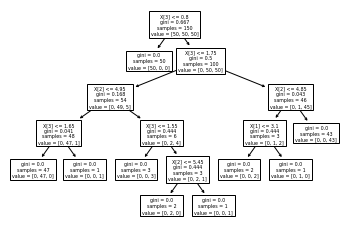

In [0]:
clf = tree.DecisionTreeClassifier(random_state=0)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)